In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import warnings
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image
warnings.filterwarnings('ignore')

# Data loading and overview

In [2]:
train_df = pd.read_csv("dev.csv")
test_df = pd.read_csv("compete.csv")

In [8]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,private,SF,105,147,0,0,0,0,...,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00,0
1,4,udp,private,SF,105,147,0,0,0,0,...,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0
2,0,tcp,http,REJ,0,0,0,0,0,0,...,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99,0
3,0,tcp,http,SF,310,2268,0,0,0,0,...,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00,0
4,0,udp,domain_u,SF,46,46,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345810,0,tcp,private,REJ,0,0,0,0,0,0,...,11,0.04,0.07,0.00,0.00,0.0,0.0,1.0,1.00,1
345811,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,40,1.00,0.00,1.00,0.10,0.0,0.0,0.0,0.00,1
345812,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.00,1
345813,0,tcp,private,REJ,0,0,0,0,0,0,...,14,0.05,0.08,0.00,0.00,0.0,0.0,1.0,1.00,1


In [12]:
(train_df['class'].value_counts()/train_df['class'].count())*100

KeyError: 'class'

In [5]:
print("{} Numerical columns, {} Categorial columns".format(list(train_df.select_dtypes(include=[np.number]).shape)[1],
    list(train_df.select_dtypes(include = ['object']).shape)[1]))

39 Numerical columns, 3 Categorial columns


In [6]:
print(f'There are {train_df.isnull().any().sum()} columns in train dataset with missing values.')

There are 0 columns in train dataset with missing values.


<AxesSubplot:xlabel='count', ylabel='srv_count'>

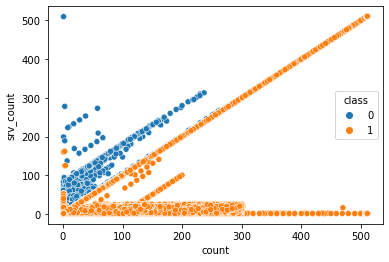

In [7]:
sns.scatterplot('count', 'srv_count', data=train_df, hue='class')

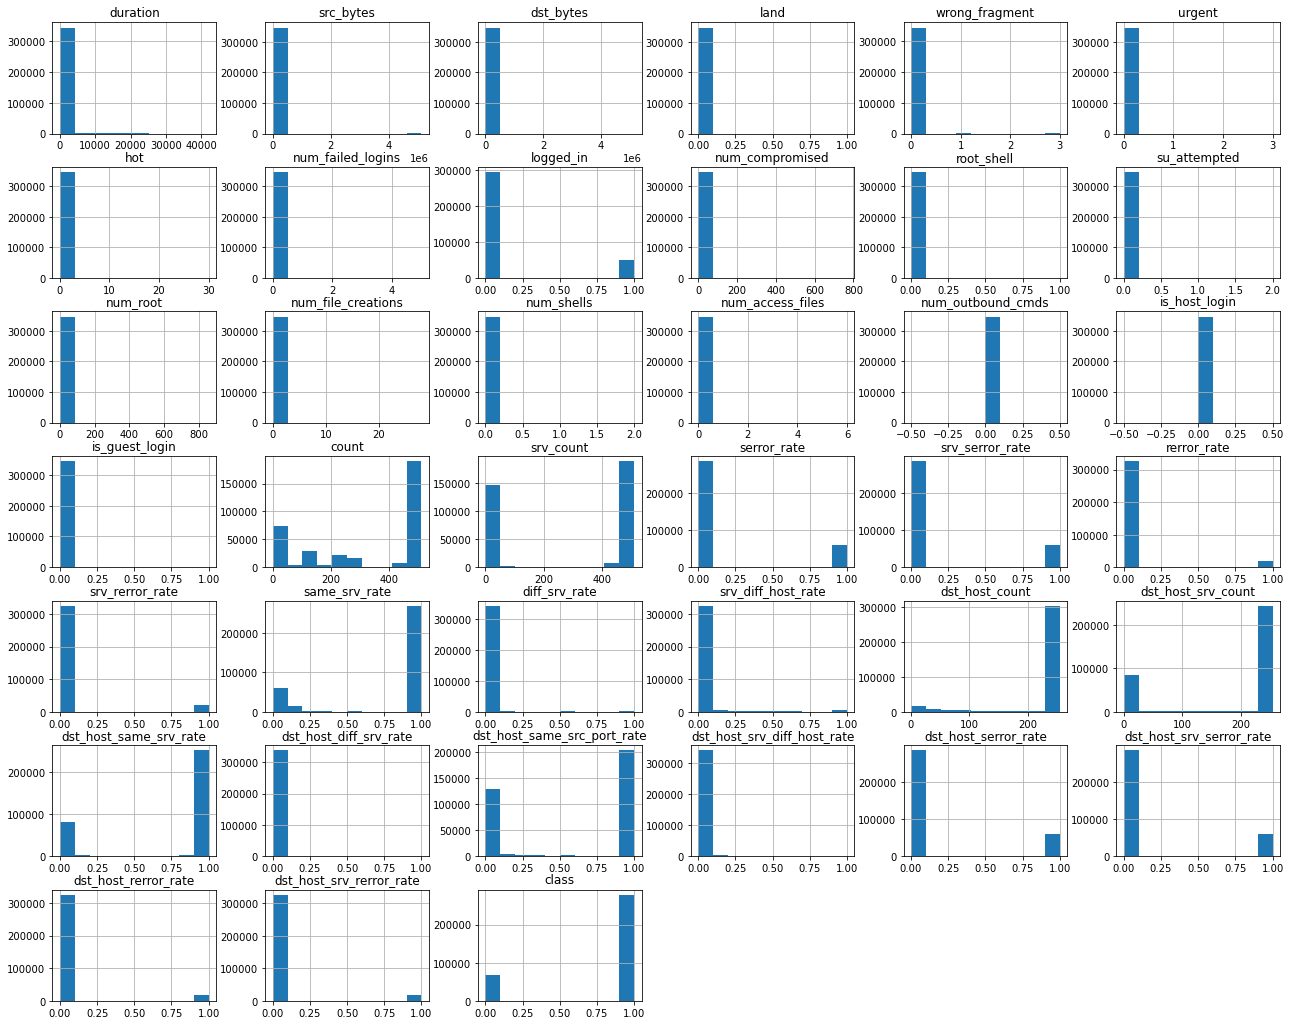

In [8]:
train_df[train_df.columns].hist(figsize=(22,18))

plt.show()

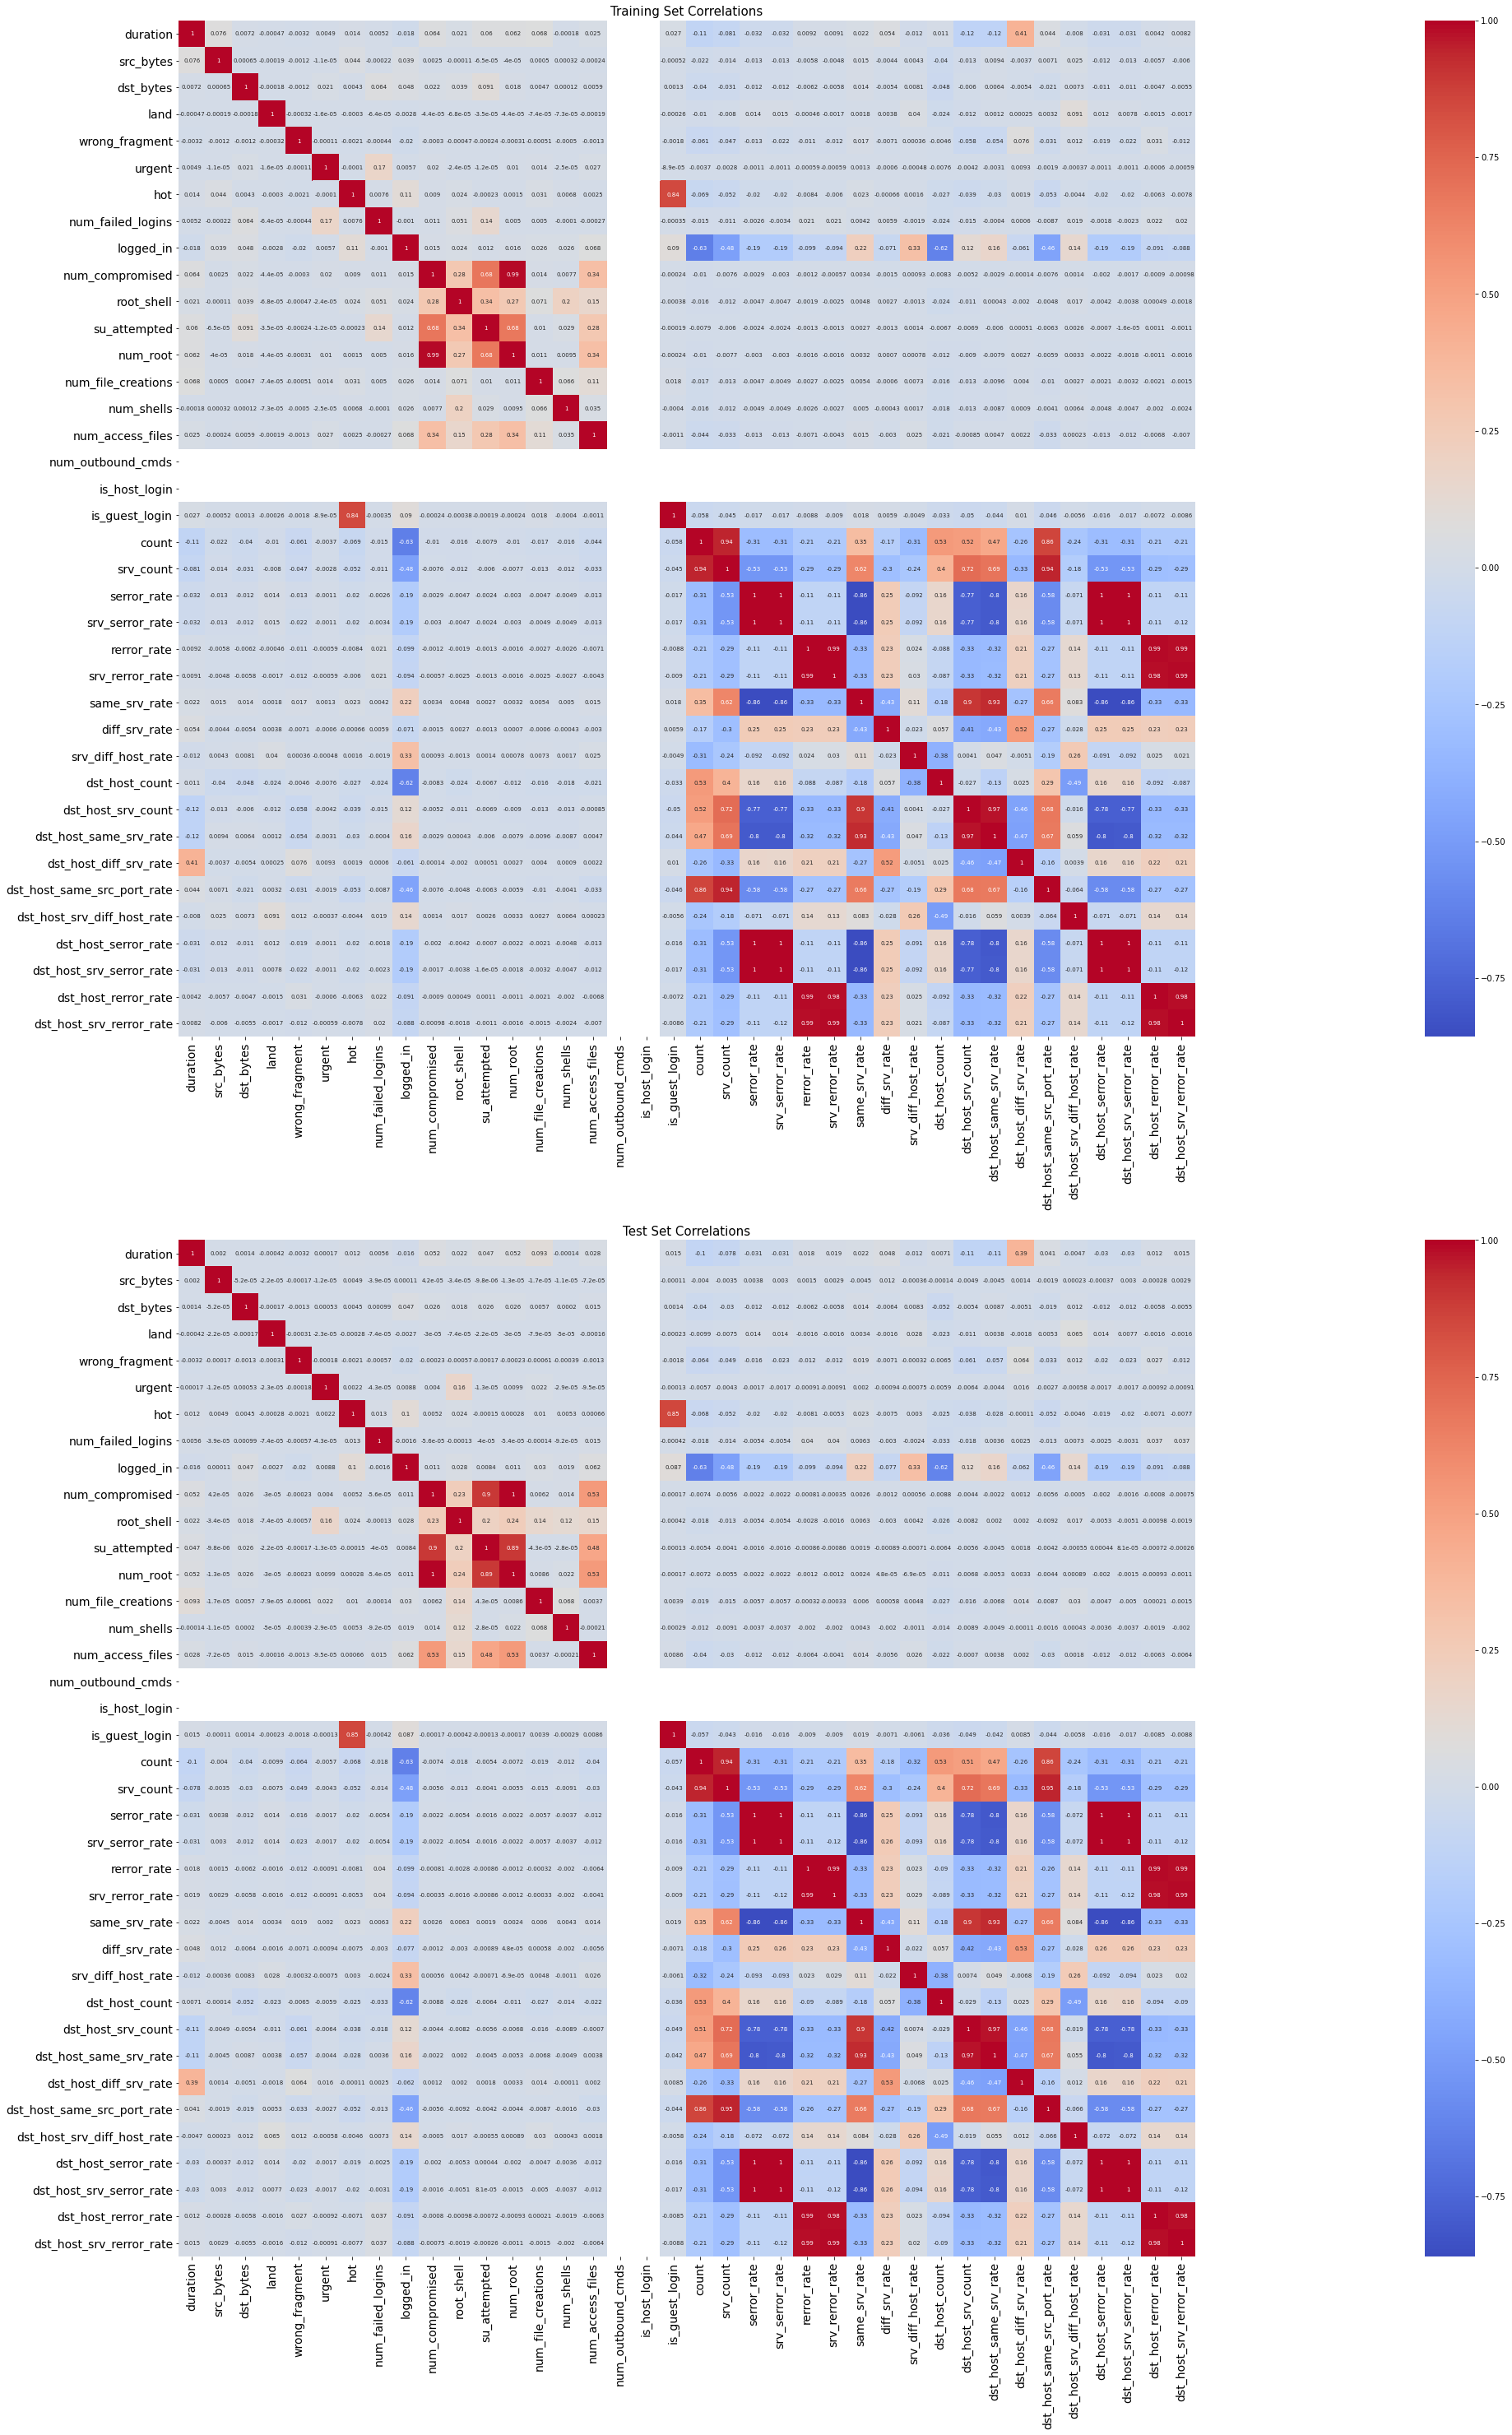

In [9]:
fig, axs = plt.subplots(nrows=2, figsize=(100, 50))

sns.heatmap(train_df.drop(['class'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 7})
sns.heatmap(test_df.drop(['Id'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 7})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

<AxesSubplot:>

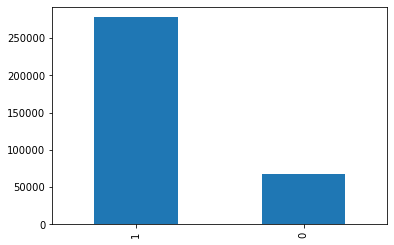

In [10]:
train_df['class'].value_counts().plot.bar()

<AxesSubplot:xlabel='num_root', ylabel='num_compromised'>

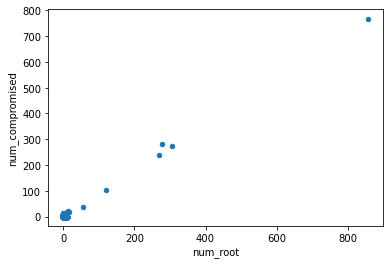

In [29]:
train_df.plot(kind='scatter', x='num_root',y='num_compromised')

<AxesSubplot:xlabel='count', ylabel='srv_count'>

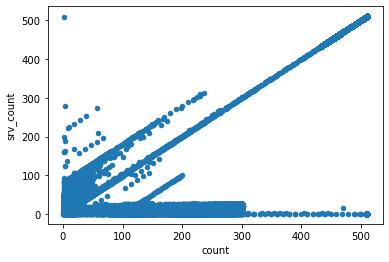

In [30]:
train_df.plot(kind='scatter', x='count',y='srv_count')

<AxesSubplot:xlabel='srv_serror_rate', ylabel='serror_rate'>

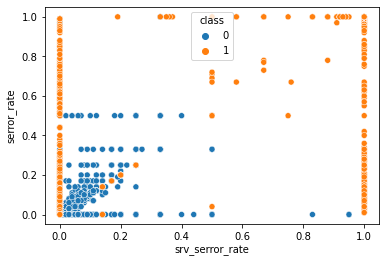

In [35]:
sns.scatterplot('srv_serror_rate', 'serror_rate', data=train_df, hue='class')

<AxesSubplot:xlabel='srv_rerror_rate', ylabel='rerror_rate'>

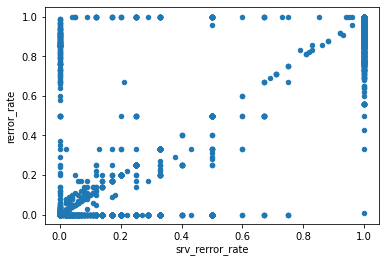

In [32]:
train_df.plot(kind='scatter', x='srv_rerror_rate',y='rerror_rate')

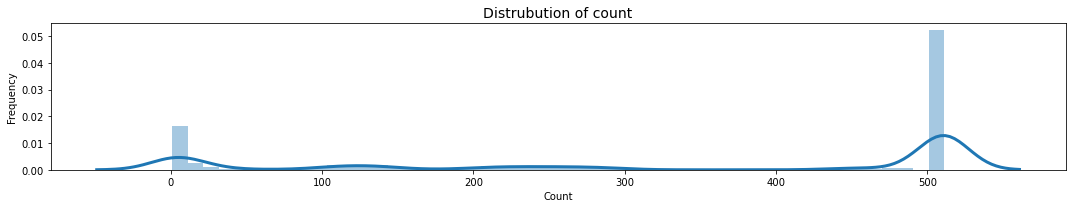

In [38]:
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train_df[(train_df["count"] > 0)]['count'], kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of count',fontsize= 14)
plt.xlabel('Count')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

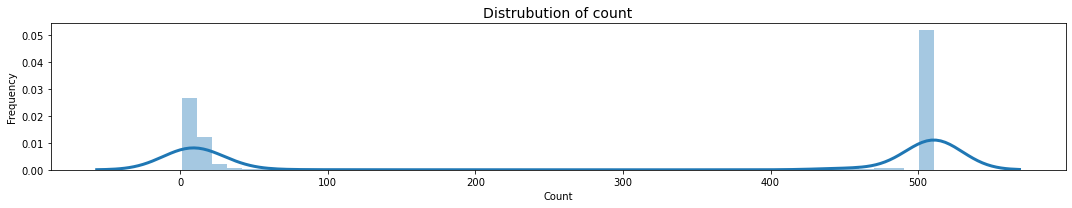

In [39]:
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train_df[(train_df["srv_count"] > 0)]['srv_count'], kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of count',fontsize= 14)
plt.xlabel('Count')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

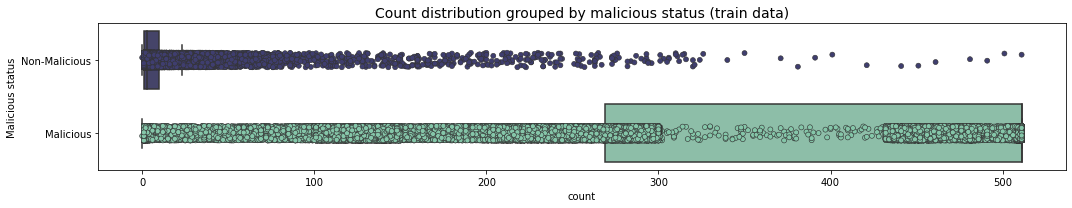

In [42]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'class', x = 'count', data = train_df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'class', x = 'count', data = train_df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['Non-Malicious', 'Malicious'])
plt.title('Count distribution grouped by malicious status (train data)',fontsize= 14)
plt.ylabel('Malicious status')
plt.tight_layout()

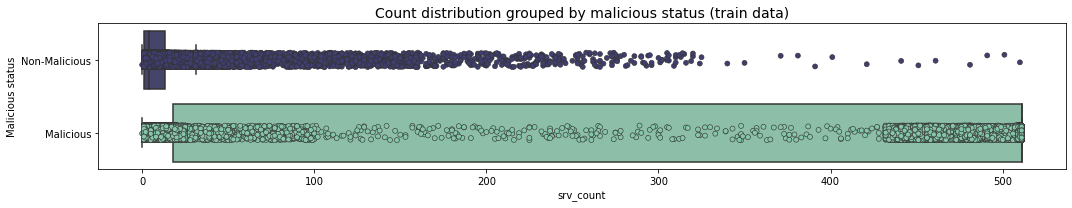

In [46]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'class', x = 'srv_count', data = train_df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'class', x = 'srv_count', data = train_df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['Non-Malicious', 'Malicious'])
plt.title('Count distribution grouped by malicious status (train data)',fontsize= 14)
plt.ylabel('Malicious status')
plt.tight_layout()

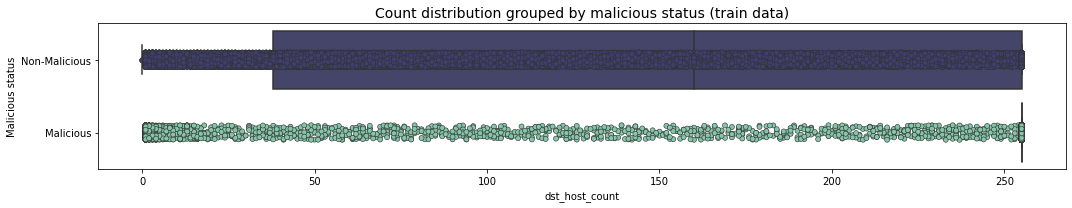

In [51]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'class', x = 'dst_host_count', data = train_df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'class', x = 'dst_host_count', data = train_df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['Non-Malicious', 'Malicious'])
plt.title('Count distribution grouped by malicious status (train data)',fontsize= 14)
plt.ylabel('Malicious status')
plt.tight_layout()

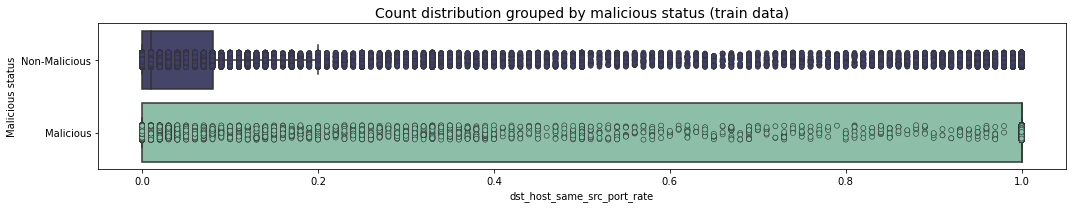

In [54]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'class', x = 'dst_host_same_src_port_rate', data = train_df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'class', x = 'dst_host_same_src_port_rate', data = train_df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['Non-Malicious', 'Malicious'])
plt.title('Count distribution grouped by malicious status (train data)',fontsize= 14)
plt.ylabel('Malicious status')
plt.tight_layout()

In [45]:
pd.DataFrame(train_df.groupby('class')['srv_count'].describe())

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,68095.0,10.946707,21.939132,0.0,1.0,4.0,13.0,510.0
1,277720.0,362.330408,226.060048,0.0,18.0,511.0,511.0,511.0


In [18]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,345815.000000,3.458150e+05,3.458150e+05,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,...,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000
mean,47.629866,1.652131e+03,8.780215e+02,0.000046,0.006278,0.000014,0.034863,0.000159,0.148238,0.009881,...,188.719954,0.754079,0.031016,0.602577,0.006650,0.176193,0.175861,0.058245,0.057501,0.803088
std,693.577062,5.905801e+04,3.331798e+04,0.006802,0.133003,0.006131,0.786947,0.016919,0.355336,1.534885,...,106.003839,0.410574,0.109775,0.481140,0.041933,0.380109,0.380426,0.230823,0.230283,0.397666
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,42088.000000,5.135678e+06,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,767.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'land'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>],
       [<AxesSubplot:title={'center':'hot'}>,
        <AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'logged_in'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>],
       [<AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>,
        <AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'is_host_login'}>],
       [<AxesSubplot:titl

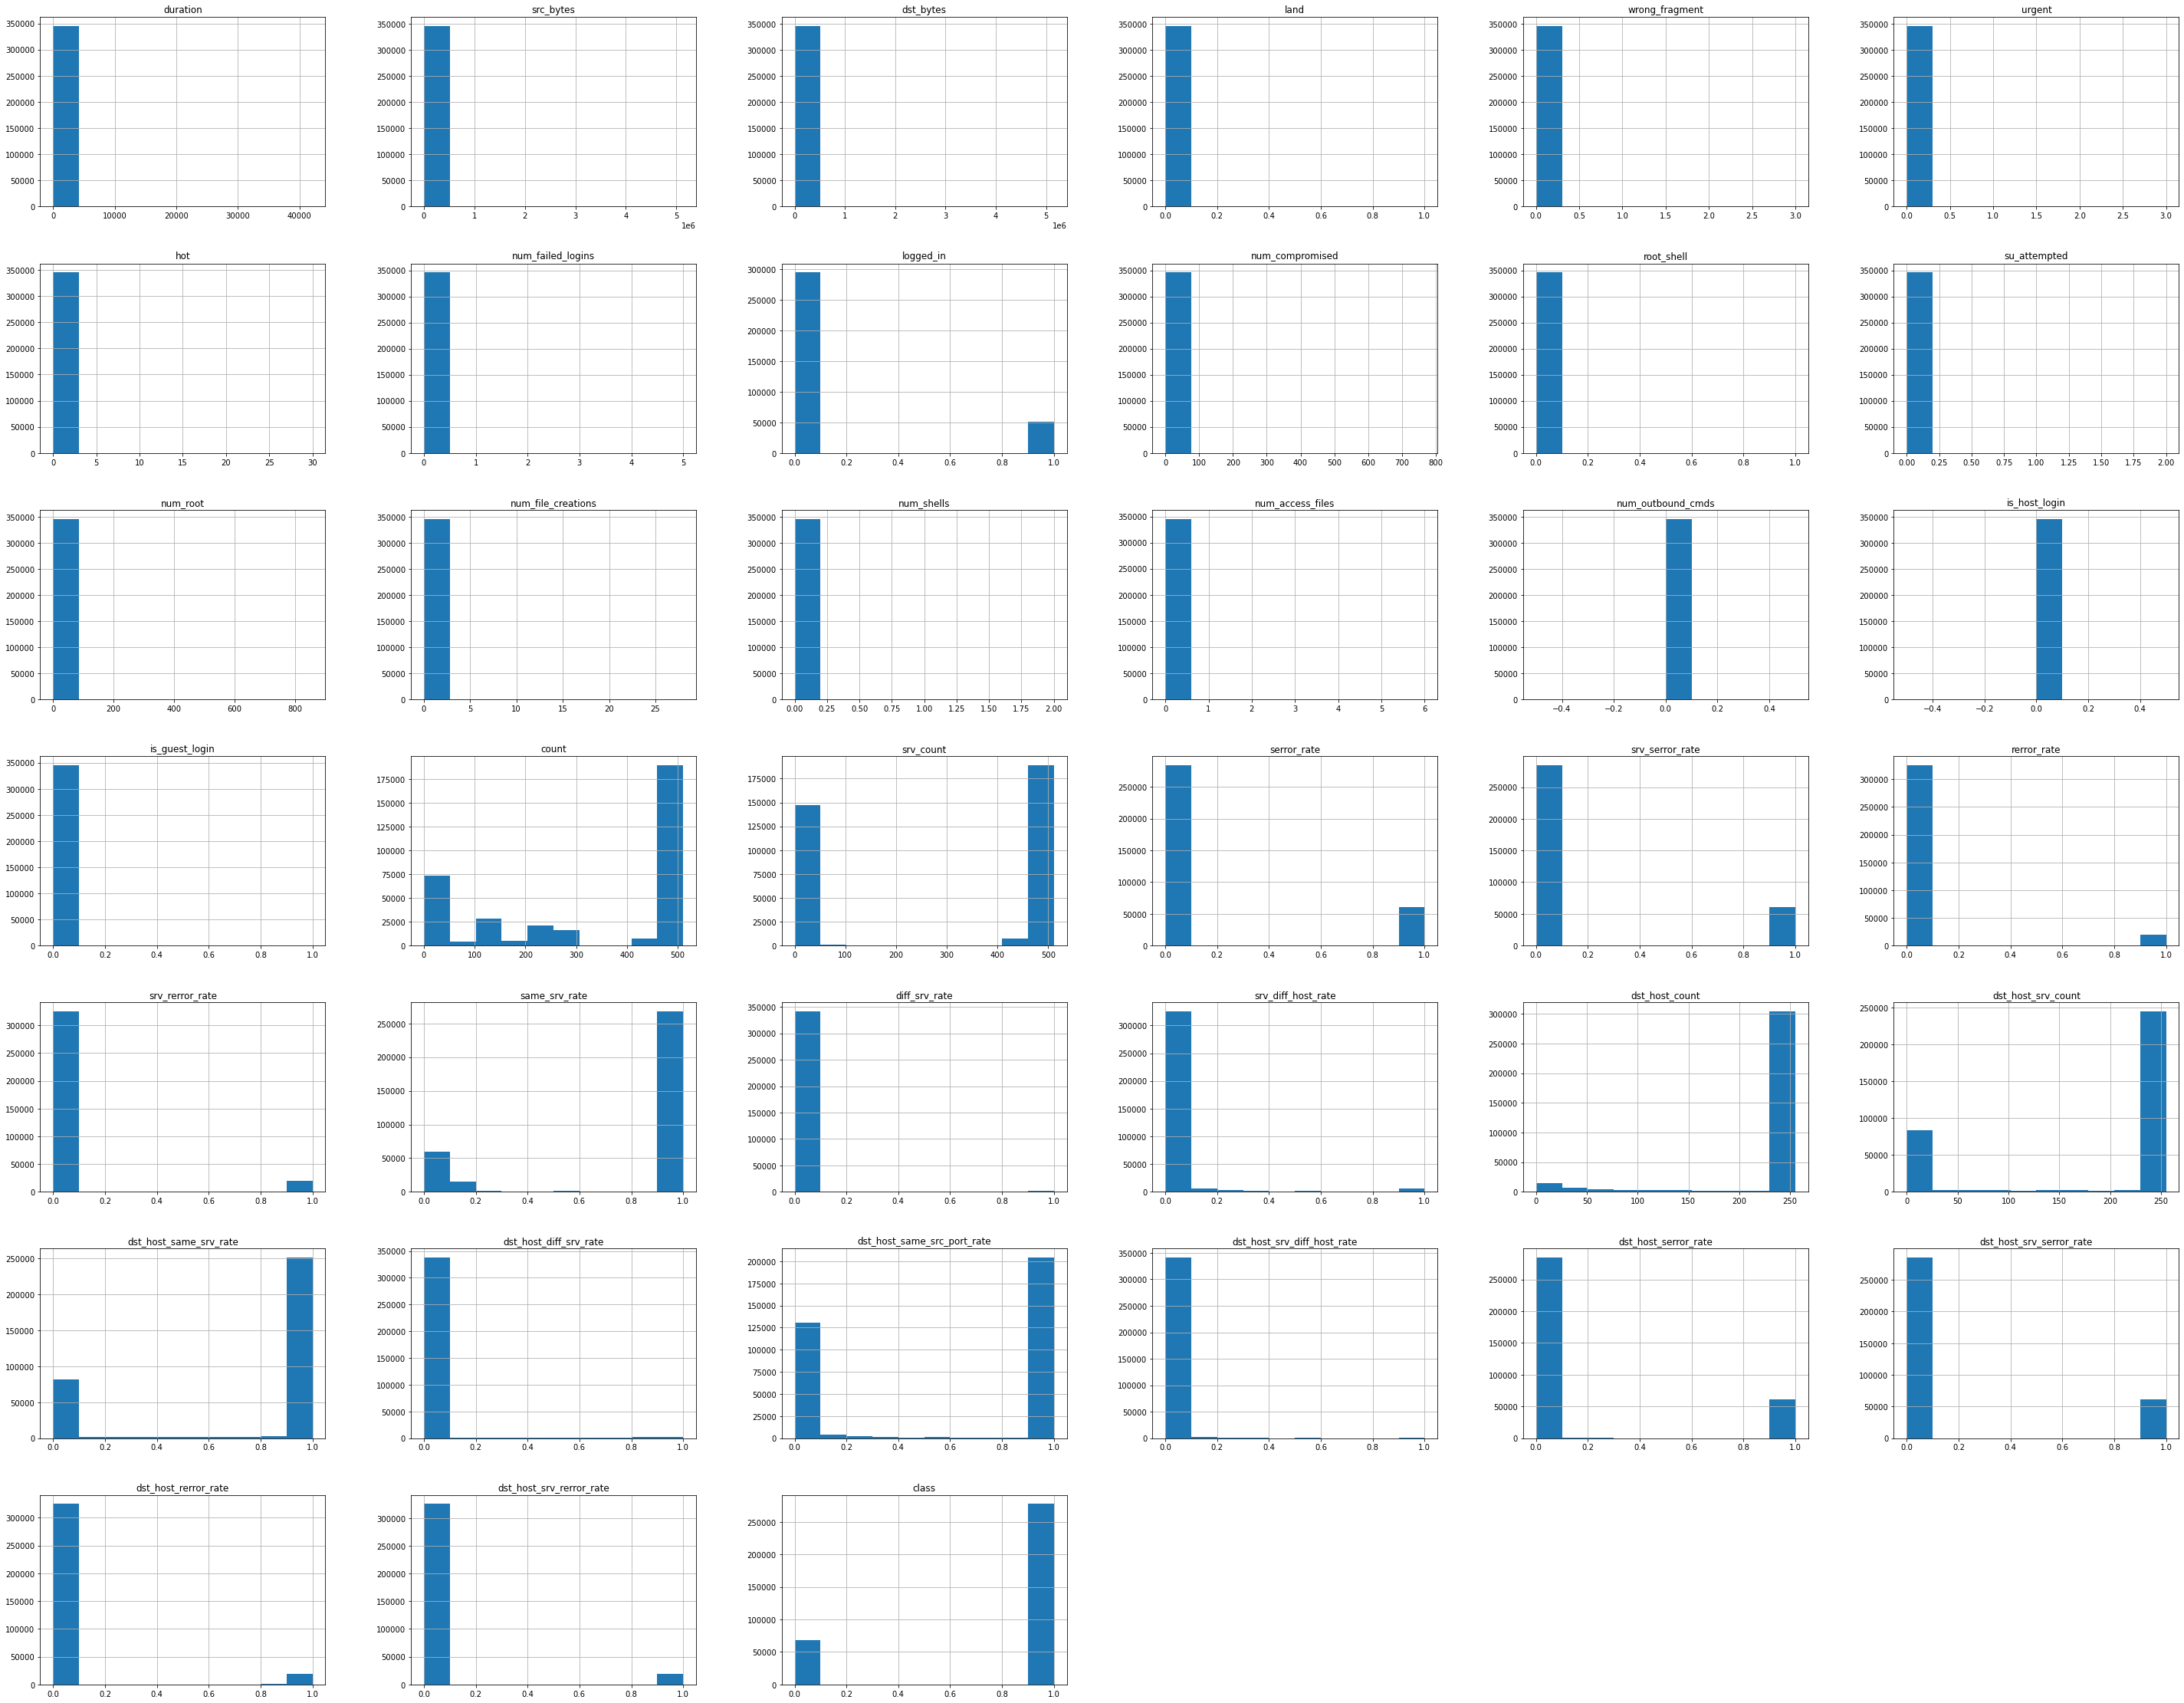

In [16]:
train_df.hist(figsize=(50, 40))